# Rainfall_Prediction_Using_Supervised_Learning _Models

# Problem_Statement :

Climate is a important aspect of human life. So, the Prediction should accurate as much as possible. In this project I have  tried to deal with the prediction of the rainfall which is also a major aspect of human life and which provide the major resource of human life which is Fresh Water. Fresh water is always a crucial resource of human survival – not only for the drinking purposes but also for farming, washing and many other purposes.

# Aim :

To determine the rainfall for effective use of water resources, crop productivity and pre planning of water structures.

# Objectives : 

Rainfall Prediction Model has a main objective in prediction of the accurance of rain in a specific division in advance by using various Machine Learning technique and find out which Model is best for rainfall prediction.

# Attribute_Information :

MinTemp : Minimum Temperature recorded in that Particular Day.(Measured In Degree Celsius)                                                              
MaxTemp : Maximum Temperature recorded in that Particular Day.(Measured In Degree Celsius)                                                              
Rainfall : Amount of Rainfall recorded In that Particular Day. (Measured In Centimeters)                                                             
Evaporation : Overall Evaporation in that Particular Day. (Measured In Millimeters per unit Time Using Evaporimeters)                                                                       
Sunshine : Overall Sunshine or density of Sunlight in that Particular Day. (Measured In Watts per Square Meter using Pyranometer)                                                                                                                
WindGustSpeed : Sudden Speed of wind from a particular Direction. (Measured In Miles per hour)                                                                                                             
WindSpeed9am : Wind Speed at 9 AM. (Measured In Miles per hour)                                                              
WindSpeed3pm : Wind Speed at 3 PM. (Measured In Miles per hour)                                                              
Humidity9am :  Humidity or Amount of Moisture in the Air at 9 AM.                                                                                                              
Humidity3pm : Humidity or Amount of Moisture in the Air at 3 PM.                                                                                                               
Pressure9am : Air Pressure at 9 AM. (Measured In Pascals)                                                                                                          
Pressure3pm : Air Pressure at 3 PM. (Measured In Pascals)                                                                                                                 
Cloud9am :  Measure of Cloud in Okta at 9 AM                                                                                
Cloud3pm :  Measure of Cloud in Okta at 3 PM                                                                                                                
Temp9am : Temperature Recorded at 9 AM. (Measured In Degree Celsius)                                                                                                                   
Temp3pm : Temperature Recorded at 3 PM. (Measured In Degree Celsius)                                                                                                                     
RainToday : Occurance of Rain today 0 for No Rain and 1 for Rainfall.                                                        
Year : What Year you are Trying to Predict the Rainfall ?                                                                    
Month : What Month you are Trying to Predict the Rainfall ?                                                                                                                    
Day : What Day you are Trying to Predict the Rainfall ?                                                                                                                        
Location_cl : Name of the State you are trying to Predict the Rainfall                                                                                                               
WindGustDir_cl : From which direction there is a sudden increase in speed of Wind.                                                                                                           
WindDir9am_cl :  Direction of wind at 9 AM                                                                                                            
WindDir3pm_cl : Direction of wind at 3 PM

# Importing Dependancies and Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# Dataset Reading :

In [2]:
df = pd.read_csv(r"Rainfall_Data.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Andhra_Pradesh,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Andhra_Pradesh,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Andhra_Pradesh,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Andhra_Pradesh,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Andhra_Pradesh,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Describing Data :

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Changing Date to individual Date,Month,Year :

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis = 1,inplace=True) 
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Andhra_Pradesh,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Andhra_Pradesh,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Andhra_Pradesh,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Andhra_Pradesh,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Andhra_Pradesh,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Conclusion:
    Here we have tried to convert the date format into Daywise, Monthwise and Yearwise format and thus new columns were generated namely day, month and year respectively.

# Replacing Yes with 1 and No with 0

In [7]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1,'NaN':0},inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Andhra_Pradesh,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Andhra_Pradesh,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Andhra_Pradesh,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Andhra_Pradesh,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Andhra_Pradesh,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


Conclusion:  
        1.Since the RainToday and RainTomorrow are having binary values namely Yes for Rain and No for No-Rain, so for performing operations, converting those Yes-No values into numerical can be the best choice.
        
2.Hence we have tried to convert those values by using the replace function.
    

# Checking for Null Values

In [8]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64

In [9]:
df.Location.isnull().sum()

0

In [10]:
df.WindGustDir.isnull().sum()

10326

In [11]:
df.WindDir9am.isnull().sum()

10566

In [12]:
df.WindDir3pm.isnull().sum()

4228

# Replacing Null Values in Categorical Variables

In [13]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [14]:
#RainToday
rtoday = df["RainToday"].mode()
print(rtoday)
df["RainToday"].fillna(value=0.0, inplace = True)

0    0.0
Name: RainToday, dtype: float64


In [15]:
#RainTomorrow
rtmomax = df["RainTomorrow"].mode()
print(rtmomax)
df["RainTomorrow"].fillna(value=0.0, inplace = True)

0    0.0
Name: RainTomorrow, dtype: float64


Conclusion:
        
1.Here we have checked for null values and tried to replace with the most appropriate values using the most frequent values in the case of Loction, WindGustDirection, WindDirection9am, WindDirection3pm.

2.In the case of RainToday and RainTomorrow we have tried to replace the null values with Mode as it is a binary and categorical value.

# Label Encoding the Data :

In [16]:
Loc = LabelEncoder()
wingustdir = LabelEncoder()
windir9am = LabelEncoder()
windir3pm = LabelEncoder()

df["Location_cl"]=Loc.fit_transform(df["Location"])
df["WindGustDir_cl"]=wingustdir.fit_transform(df["WindGustDir"])
df["WindDir9am_cl"]=windir9am.fit_transform(df["WindDir9am"])
df["WindDir3pm_cl"]=windir3pm.fit_transform(df["WindDir3pm"])
df = df.drop(["Location","WindGustDir","WindDir9am","WindDir3pm"],axis = 1)

Conclusion:
    
1.Here Label_Encoder is used to give numerical values to the string values in the Location, WindGustDirection, WindDirection9am, WindDirection3pm columns 

# Replacing Null Values in Continuous Variables with Mean and Mode :

In [17]:
#MinTemp
minTemp = df["MinTemp"].mean()
df["MinTemp"].fillna(value=minTemp, inplace = True)

#MaxTemp
maxTemp = df["MaxTemp"].mean()
df["MaxTemp"].fillna(value=maxTemp, inplace = True)

#Rainfall
rainfall = df["Rainfall"].mean()
df["Rainfall"].fillna(value=rainfall, inplace = True)

#Evaporation
evapo = df["Evaporation"].mean()
df["Evaporation"].fillna(value=evapo, inplace = True)

#Sunshine
sunshine = df["Sunshine"].mean()
df["Sunshine"].fillna(value=sunshine, inplace = True)

#WindGustSpeed
wgspeed = df["WindGustSpeed"].mean()
df["WindGustSpeed"].fillna(value=wgspeed, inplace = True)

#WindSpeed9am
ws9am = df["WindSpeed9am"].mean()
df["WindSpeed9am"].fillna(value=ws9am, inplace = True)

#WindSpeed3pm
ws3pm = df["WindSpeed3pm"].mean()
df["WindSpeed3pm"].fillna(value=ws3pm, inplace = True)

#Humidity9am
h9am= df["Humidity9am"].mean()
df["Humidity9am"].fillna(value=h9am, inplace = True)

#Humidity3pm
h3pm = df["Humidity3pm"].mean()
df["Humidity3pm"].fillna(value=h3pm, inplace = True)

#Pressure9am
p9am = df["Pressure9am"].mean()
df["Pressure9am"].fillna(value=p9am, inplace = True)

#Pressure3pm
p3pm = df["Pressure3pm"].mean()
df["Pressure3pm"].fillna(value=p3pm, inplace = True)

#Cloud9am
c9am = df["Cloud9am"].mean()
df["Cloud9am"].fillna(value=c9am, inplace = True)

#Cloud3pm
c3pm = df["Cloud3pm"].mean()
df["Cloud3pm"].fillna(value=c3pm, inplace = True)

#Temp9am
temp9am = df["Temp9am"].mean()
df["Temp9am"].fillna(value=temp9am, inplace = True)

#Temp3pm
temp3pm = df["Temp3pm"].mean()
df["Temp3pm"].fillna(value=temp3pm, inplace = True)

df.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,RainToday,RainTomorrow,year,month,day,Location_cl,WindGustDir_cl,WindDir9am_cl,WindDir3pm_cl
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,...,22.4,0.0,0.0,2017,6,21,34,0,9,1
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,...,24.5,0.0,0.0,2017,6,22,34,6,9,3
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,...,26.1,0.0,0.0,2017,6,23,34,3,9,14
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,...,26.0,0.0,0.0,2017,6,24,34,9,10,3
145459,14.9,23.221348,0.0,5.468232,7.611178,40.03523,17.0,17.0,62.0,36.0,...,20.9,0.0,0.0,2017,6,25,34,13,2,2


Conclusion:

1.Here null values from the continuous variable columns are replaced by the mean value of that column.

In [18]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustSpeed     0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
year              0
month             0
day               0
Location_cl       0
WindGustDir_cl    0
WindDir9am_cl     0
WindDir3pm_cl     0
dtype: int64

Conclusion:

1. Here we can see that there are no null values in our dataset now.

# Label_Encoding_Details

In [19]:
mapping_location = {index: label for index,label in enumerate(Loc.classes_)}
mapping_location

{0: 'Andhmar_and_Nicobar_Islands',
 1: 'Andhra_Pradesh',
 2: 'Arunachal_Pradesh',
 3: 'Assam',
 4: 'Bihar',
 5: 'Chandigarh',
 6: 'Chattisgarh',
 7: 'Dadra_and_Nagar_Haveli',
 8: 'Delhi',
 9: 'Diu_and_Daman',
 10: 'Goa',
 11: 'Gujrat',
 12: 'Haryana',
 13: 'Himachal_Pradesh',
 14: 'Jammu_and_Kashmir',
 15: 'Jharkhand',
 16: 'Karnataka',
 17: 'Kerala',
 18: 'Ladakh',
 19: 'Lakshadweep',
 20: 'Madhya_Pradesh',
 21: 'Maharashtra',
 22: 'Manipur',
 23: 'Meghalaya',
 24: 'Mizoram',
 25: 'Nagaland',
 26: 'Odisha',
 27: 'Puddhucherry',
 28: 'Punjab',
 29: 'Rajasthan',
 30: 'Sikkim',
 31: 'Tamil_Nadu',
 32: 'Telangana',
 33: 'Tripura',
 34: 'Uttar_Pradesh',
 35: 'Uttarakhand',
 36: 'West_Bengal'}

In [20]:
mapping_wingustdir = {index: label for index,label in enumerate(wingustdir.classes_)}
mapping_wingustdir

{0: 'E',
 1: 'ENE',
 2: 'ESE',
 3: 'N',
 4: 'NE',
 5: 'NNE',
 6: 'NNW',
 7: 'NW',
 8: 'S',
 9: 'SE',
 10: 'SSE',
 11: 'SSW',
 12: 'SW',
 13: 'W',
 14: 'WNW',
 15: 'WSW'}

In [21]:
mapping_windir9am = {index: label for index,label in enumerate(windir9am.classes_)}
mapping_windir9am

{0: 'E',
 1: 'ENE',
 2: 'ESE',
 3: 'N',
 4: 'NE',
 5: 'NNE',
 6: 'NNW',
 7: 'NW',
 8: 'S',
 9: 'SE',
 10: 'SSE',
 11: 'SSW',
 12: 'SW',
 13: 'W',
 14: 'WNW',
 15: 'WSW'}

In [22]:
mapping_windir3pm = {index: label for index,label in enumerate(windir3pm.classes_)}
mapping_windir3pm

{0: 'E',
 1: 'ENE',
 2: 'ESE',
 3: 'N',
 4: 'NE',
 5: 'NNE',
 6: 'NNW',
 7: 'NW',
 8: 'S',
 9: 'SE',
 10: 'SSE',
 11: 'SSW',
 12: 'SW',
 13: 'W',
 14: 'WNW',
 15: 'WSW'}

Conclusion:

1.Here using the column.classes_ method we find out which numerical values are asigned to the types of string values in the particular categorical columns.

# Exploratory_Data_Analysis

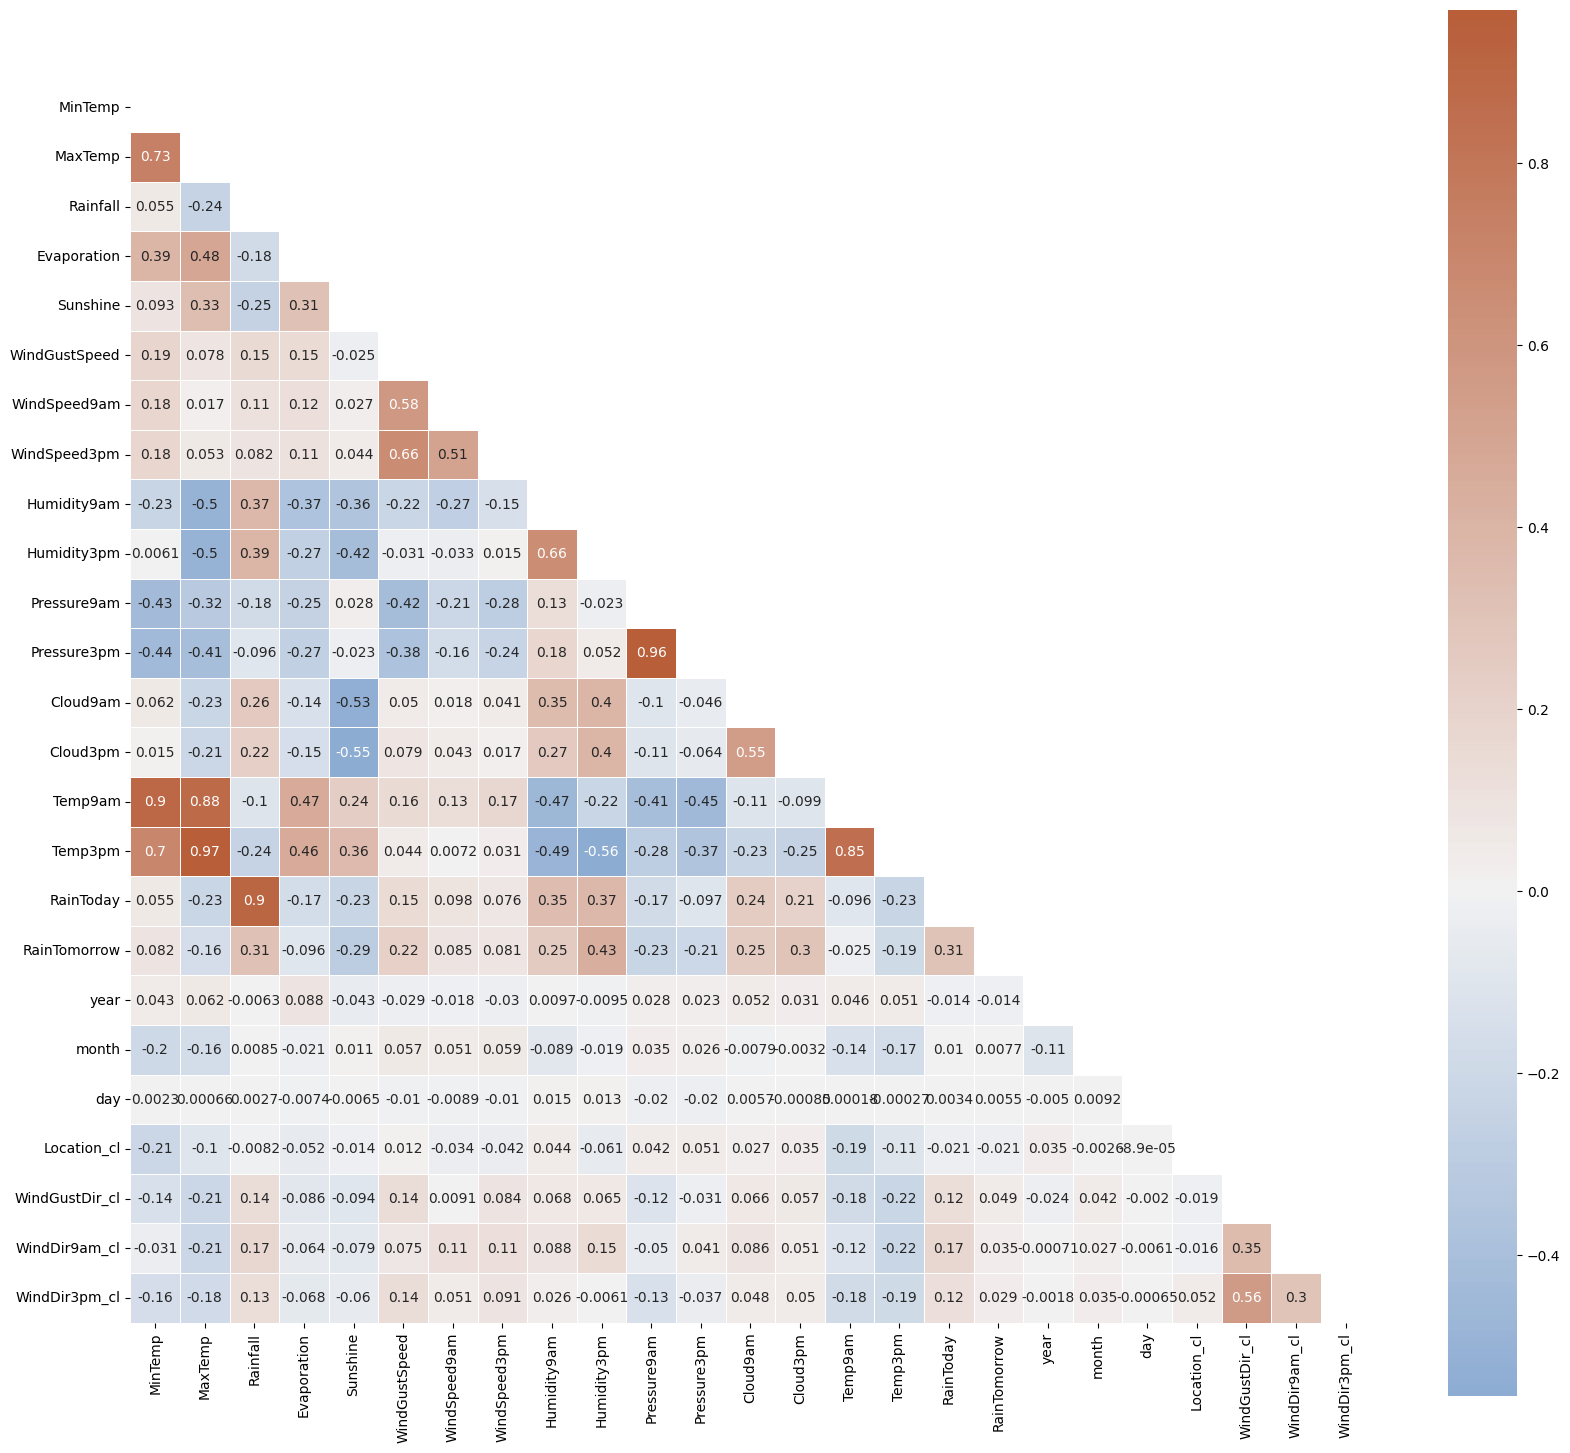

In [81]:
# Correlation Heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

Conclusion:

1.Heatmap is used to find out the relatiomship between two continuous variables.
2.Darker brown shades show highest postive correlations whereas darker blue shade shows negative correlation.
3.RAinfall, Humidity3pm,Cloud3pm, RainToday shows Highest Positive Correlation with our Target Variable whereas Sunshine and pressure shows the highest negative correlation.
4.Temp9am has the highest positive correlation with MinTemp while Temp3pm and Humidity3pm shows the highest negative correlation with each other. 

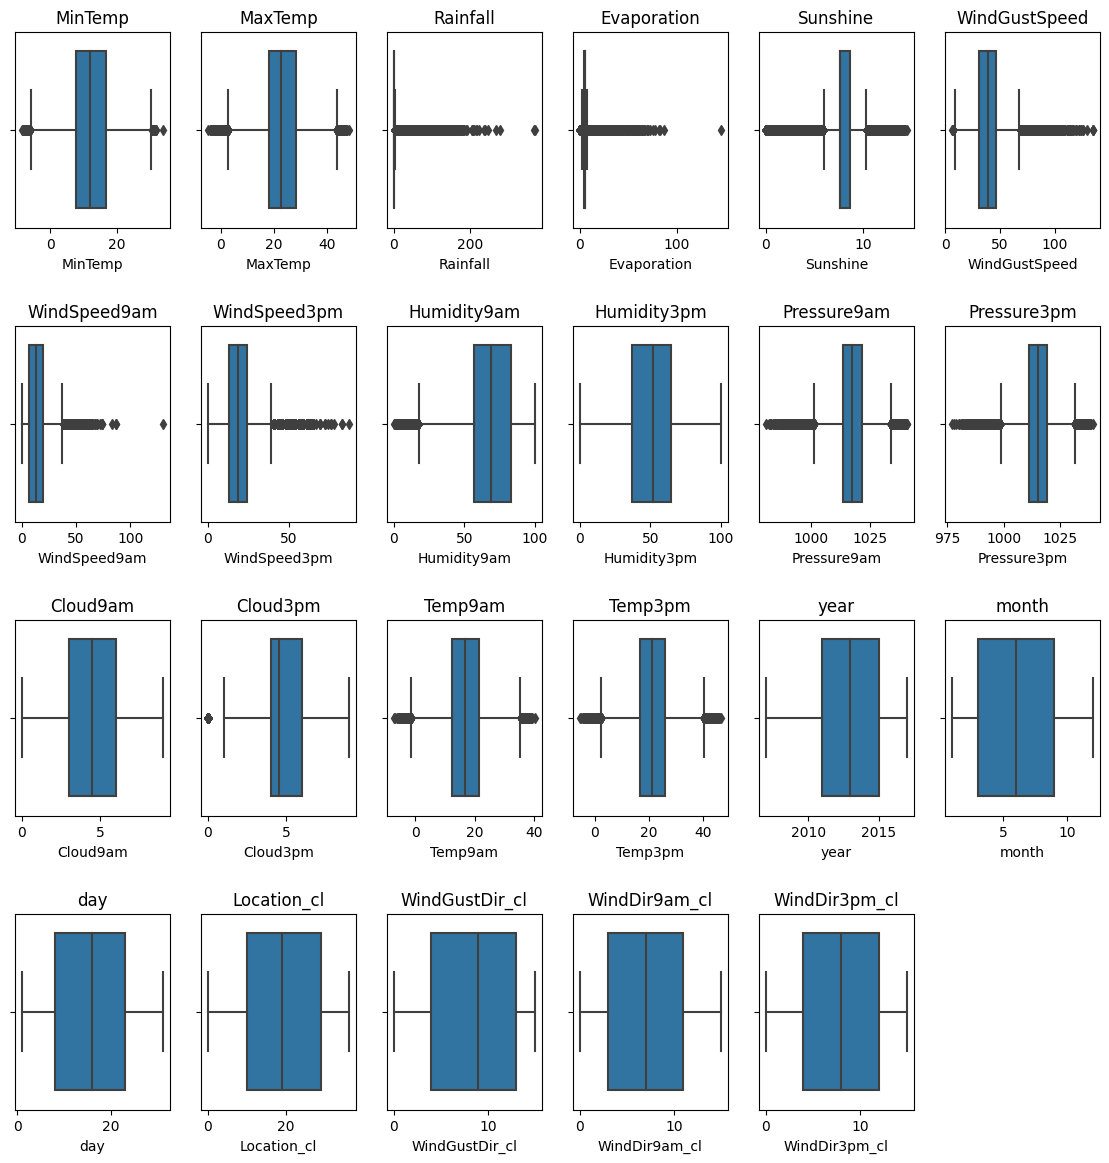

In [23]:
numeric_cols = df.drop(["RainTomorrow","RainToday"], axis=1)
plt.figure(figsize=(14, 14))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

Conclusion:
    
    1.An outlier can be an indication of exciting possibility, but can also cause serious problems in statistical analyses, so handling outliers is very important.
    2. Here we have used the box plot to find out the outliers from the datasets.
    3. Here we can see that MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,
    WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
    are the columns with numbers of outliers.
    4. So to handle outliers we must use outliers handling techniques such as IQR method, standardizing data. 

# Removing Outliers from Dataset :

# MinTemp

In [24]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.MinTemp.quantile(0.75) -df.MinTemp.quantile(0.25))

-5.950000000000002 30.450000000000003
9.100000000000001


In [25]:
df.loc[df['MinTemp']>=30.450000000000003,'MinTemp']=30.450000000000003
df.loc[df['MinTemp']<=-5.950000000000002,'MinTemp']=-5.950000000000002

# MaxTemp

In [26]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.MaxTemp.quantile(0.75) -df.MaxTemp.quantile(0.25))

2.700000000000001 43.5
10.2


In [27]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.700000000000001,'MaxTemp']=2.700000000000001

# Rainfall

In [28]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Rainfall.quantile(0.75) -df.Rainfall.quantile(0.25))

-1.5 2.5
1.0


In [29]:
df.loc[df['Rainfall']>=2.5,'Rainfall']=2.5
df.loc[df['Rainfall']<=-1.5,'Rainfall']=-1.5

# Evaporation

In [30]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Evaporation.quantile(0.75) -df.Evaporation.quantile(0.25))

1.797652715616307 7.670578807306155
1.468231522922462


In [31]:
df.loc[df['Evaporation']>=7.670578807306155,'Evaporation']=7.670578807306155
df.loc[df['Evaporation']<=1.797652715616307,'Evaporation']=1.797652715616307

# Sunshine

In [32]:
IQR=df.Sunshine.quantile(0.75)-df.Sunshine.quantile(0.25)
lower_bridge=df.Sunshine.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Sunshine.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Sunshine.quantile(0.75) -df.Sunshine.quantile(0.25))

5.977943801652892 10.333233719008263
1.0888224793388428


In [33]:
df.loc[df['Sunshine']>=10.333233719008263,'Sunshine']=10.333233719008263
df.loc[df['Sunshine']<=5.977943801652892,'Sunshine']=5.977943801652892

# WindGustSpeed

In [34]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.WindGustSpeed.quantile(0.75) -df.WindGustSpeed.quantile(0.25))

8.5 68.5
15.0


In [35]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

# WindSpeed9am

In [36]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.WindSpeed9am.quantile(0.75) -df.WindSpeed9am.quantile(0.25))

-11.0 37.0
12.0


In [37]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

# WindSpeed3pm

In [38]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.WindSpeed3pm.quantile(0.75) -df.WindSpeed3pm.quantile(0.25))

-3.5 40.5
11.0


In [39]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

# Humidity9am 

In [40]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Humidity9am.quantile(0.75) -df.Humidity9am.quantile(0.25))

18.0 122.0
26.0


In [41]:
df.loc[df['Humidity9am']>=122.0,'Humidity9am']=122.0
df.loc[df['Humidity9am']<=18.0,'Humidity9am']=18.0

# Humidity3pm

In [42]:
IQR=df.Humidity3pm.quantile(0.75)-df.Humidity3pm.quantile(0.25)
lower_bridge=df.Humidity3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Humidity3pm.quantile(0.75) -df.Humidity3pm.quantile(0.25))

-5.0 107.0
28.0


In [43]:
df.loc[df['Humidity3pm']>=107,'Humidity3pm']=107
df.loc[df['Humidity3pm']<=-5.0,'Humidity3pm']=-5.0

# Pressure9am

In [44]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Pressure9am.quantile(0.75) -df.Pressure9am.quantile(0.25))

1001.0500000000001 1034.25
8.299999999999955


In [45]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.0500000000001,'Pressure9am']=1001.0500000000001

# Pressure3pm

In [46]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Pressure3pm.quantile(0.75) -df.Pressure3pm.quantile(0.25))

998.6500000000001 1031.85
8.299999999999955


In [47]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.6500000000001,'Pressure3pm']=998.6500000000001

# Cloud9am

In [48]:
IQR=df.Cloud9am.quantile(0.75)-df.Cloud9am.quantile(0.25)
lower_bridge=df.Cloud9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Cloud9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Cloud9am.quantile(0.75) -df.Cloud9am.quantile(0.25))

-1.5 10.5
3.0


In [49]:
df.loc[df['Cloud9am']>=10.5,'Cloud9am']=10.5
df.loc[df['Cloud9am']<=-1.5,'Cloud9am']=-1.5

# Cloud9am

In [50]:
IQR=df.Cloud3pm.quantile(0.75)-df.Cloud3pm.quantile(0.25)
lower_bridge=df.Cloud3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Cloud3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Cloud3pm.quantile(0.75) -df.Cloud3pm.quantile(0.25))

1.0 9.0
2.0


In [51]:
df.loc[df['Cloud3pm']>=9.0,'Cloud3pm']=9.0
df.loc[df['Cloud3pm']<=1.0,'Cloud3pm']=1.0

# Temp9am

In [52]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Temp9am.quantile(0.75) -df.Temp9am.quantile(0.25))

-1.4999999999999982 35.3
9.2


In [53]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.4999999999999982,'Temp9am']=-1.4999999999999982

# Temp3pm

In [54]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
print(df.Temp3pm.quantile(0.75) -df.Temp3pm.quantile(0.25))

2.4499999999999993 40.45
9.5


In [55]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.4499999999999993,'Temp3pm']=2.4499999999999993

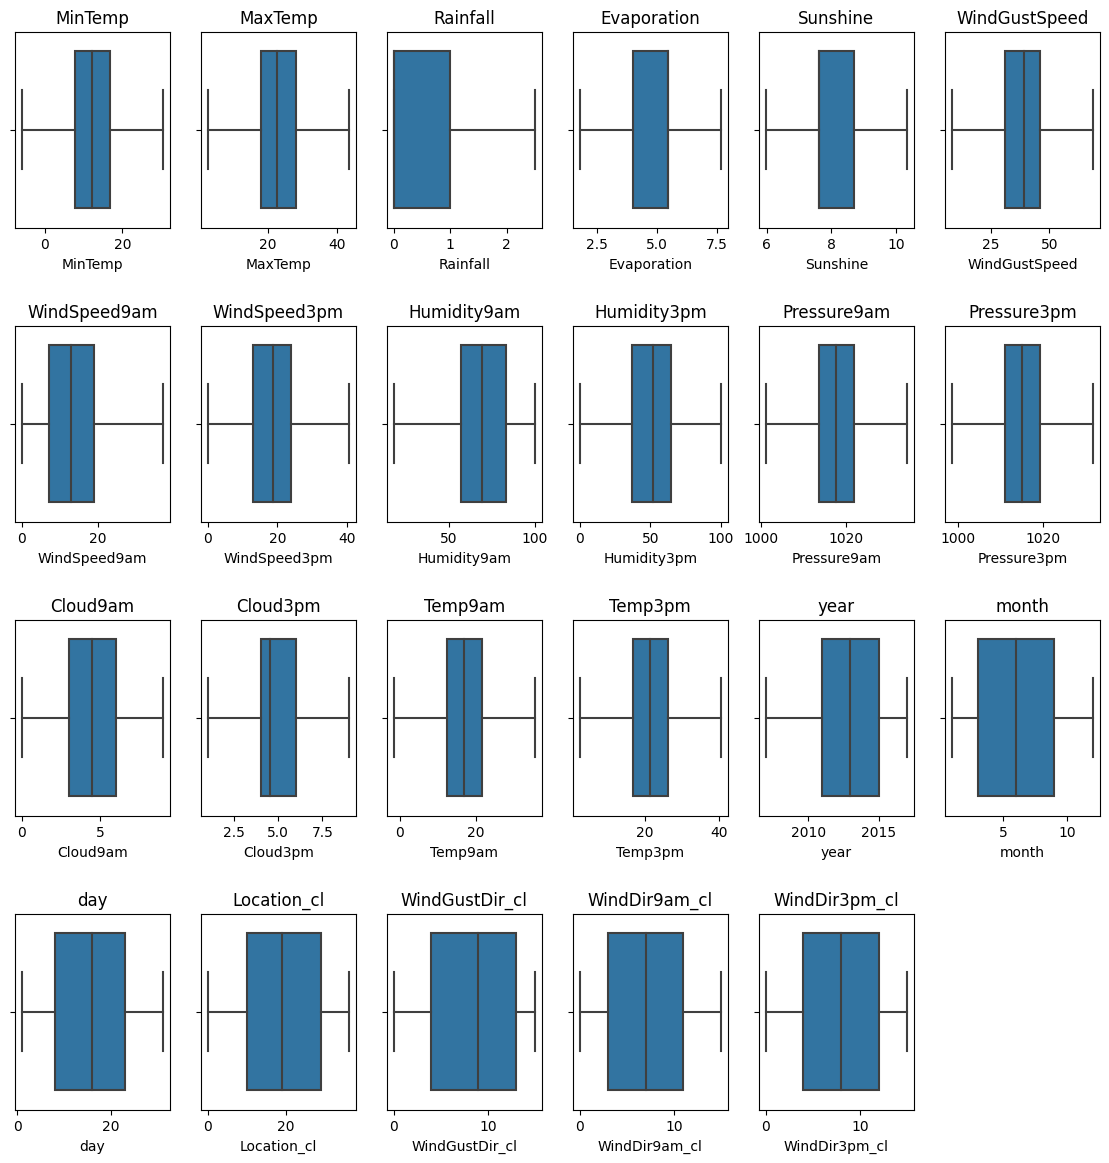

In [56]:
numeric_cols = df.drop(["RainTomorrow","RainToday"], axis=1)
plt.figure(figsize=(14, 14))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

Conclusion :

1.Here we have implemented the IQR method for handling outliers.

2.Hence, we can see that the outliers have been handled successfully for the features shown in the above graph.

3.IQR uses method of identifying outliers to set up a “fence” outside of Q1 and Q3.

In [57]:
#Saving the preprocessed data into a csv file. Now we can use this csv file for model #training and further process.

df.to_csv("Processed.csv", index=False)
df_final=pd.read_csv("Processed.csv")
df_final.shape
df_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,RainToday,RainTomorrow,year,month,day,Location_cl,WindGustDir_cl,WindDir9am_cl,WindDir3pm_cl
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,...,21.8,0.0,0.0,2008,12,1,1,13,13,14
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,...,24.3,0.0,0.0,2008,12,2,1,14,6,15
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,...,23.2,0.0,0.0,2008,12,3,1,15,13,15
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,...,26.5,0.0,0.0,2008,12,4,1,4,9,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,...,29.7,0.0,0.0,2008,12,5,1,13,1,7


# Model Building

In [58]:
# Assigning the features and  target variables from the dataset.
features = df_final.drop("RainTomorrow", axis=1)
target = df_final['RainTomorrow']
#Splitting the dataset into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# SMOTE Analysis

In [59]:
sm=SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0.0: 90866, 1.0: 25502})
The number of classes after fit Counter({0.0: 90866, 1.0: 90866})


Conclusion:
    
    1.SMOTE or Synthetic Minority Oversampling Technique is used to oversample the class of less datapoints for eg. in our
    case there are 90866 datapoints are present in the dataset contributing for class 0 i.e there will be no Rain Tomorrow
    and there are 25502 datapoints contributing to class 1 i.e there will be Rain Tomorrow, so here we can see the
    imbalance of data.
    2.So to balance the number of datapoints i.e. there will be same number of datapoints contributing for the Classes i.e
    class 0 and class 1, we use SMOTE analysis.
    3.After Using the smote analysis we can see that both the classes are balanced.

# Logistic Regression

In [60]:
t0=time.time()
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_sm,y_train_sm)
y_pred = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
tt_lr = time.time()-t0
print("Accuracy = {}".format(accuracy_lr))
print("Time taken = {}".format(tt_lr))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.7778770796095147
Time taken = 4.2344677448272705
[[17744  4973]
 [ 1489  4886]]
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85     22717
         1.0       0.50      0.77      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



Conclusion: 
    1.Logistic regression is used for binary or multi-class classification, and the target variable always has to be categorical.
    

# Decision Tree

In [61]:
t0=time.time()
params_dt = {'max_depth': 16,
             'max_features': "sqrt",
            'random_state':42}
model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(X_train_sm,y_train_sm)
y_pred = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
tt_dt = time.time()-t0
print("Accuracy = {}".format(accuracy_dt))
print("Time taken = {}".format(tt_dt))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.7899078784545579
Time taken = 1.5919976234436035
[[19025  3692]
 [ 2420  3955]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86     22717
         1.0       0.52      0.62      0.56      6375

    accuracy                           0.79     29092
   macro avg       0.70      0.73      0.71     29092
weighted avg       0.81      0.79      0.80     29092



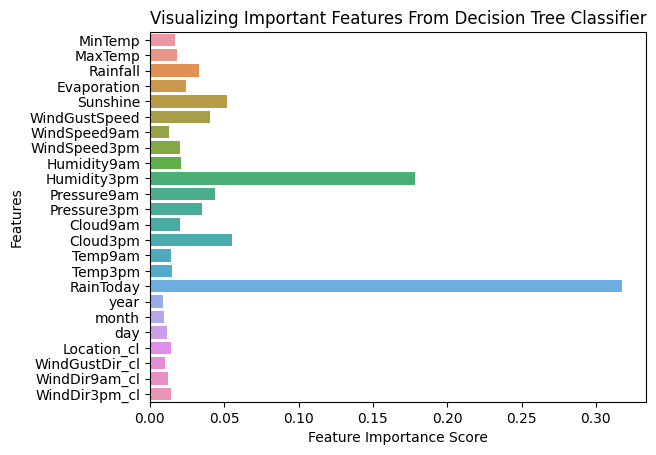

In [62]:
features = df_final.drop("RainTomorrow", axis=1)
feature_imp1 = model_dt.feature_importances_
sns.barplot(x=feature_imp1, y=features.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Decision Tree Classifier")
plt.show()

Conclusion:
    
    1.Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the 
    optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner
    until all, or the majority of records have been classified under specific class labels.
    2.Our Decision Tree Classifier gives us the amount of importance of a particular fraeature in model building 
    using the model.feature_importances_ method in terms of percentage.
    3. From above diagram it is clear that RainToday is the most important feature followed by humidity3pm and so on.
    4.Humidity3pm and RainToday together contributes to around 50 percent importance of the model building .

# Random Forest

In [63]:
t0=time.time()
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}
model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(X_train_sm,y_train_sm)
y_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
tt_rf = time.time()-t0
print("Accuracy = {}".format(accuracy_rf))
print("Time taken = {}".format(tt_rf))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.8429808882166919
Time taken = 123.27342319488525
[[20378  2339]
 [ 2229  4146]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     22717
         1.0       0.64      0.65      0.64      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.77      0.77     29092
weighted avg       0.84      0.84      0.84     29092



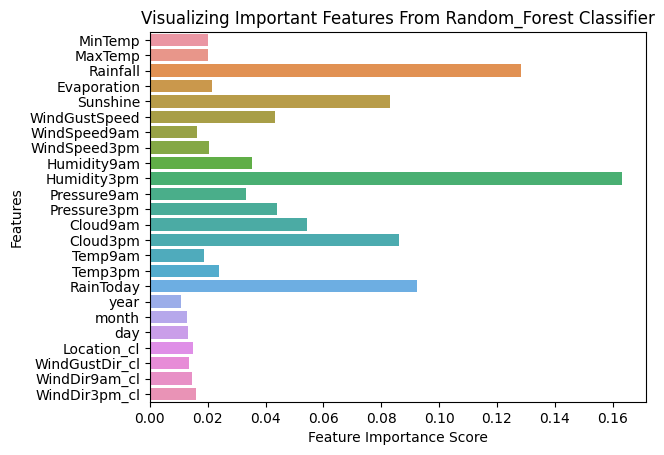

In [64]:
features = df_final.drop(["RainTomorrow"], axis=1)
feature_imp1 = model_rf.feature_importances_
sns.barplot(x=feature_imp1, y=features.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random_Forest Classifier")
plt.show()

Conclusion:
    
    1.Random forests or random decision forests is an ensemble learning method for classification, regression and other 
    tasks that operates by constructing a multitude of decision trees at training time.
    2.For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks,
    the mean or average prediction of the individual trees is returned. Random decision forests correct for decision
    trees' habit of overfitting to their training set.
    3.Our Random Forest Classifier gives us the amount of importance of a particular fraeature in model building 
    using the model.feature_importances_ method in terms of percentage.
    4. From above diagram it is clear that Humidity3pm is the most important feature followed by Rainfall,RainToday and 
    so on.


# KNN Classifier

In [65]:
#knn classifier
t0=time.time()
params_knn = {'n_neighbors':5,
             'p':2,
             'metric':'minkowski',
                }
model_knn = KNeighborsClassifier(**params_knn)
model_knn.fit(X_train_sm,y_train_sm)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
tt_knn = time.time()-t0
print("Accuracy = {}".format(accuracy_knn))
print("Time taken = {}".format(tt_knn))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy = 0.7469407397222604
Time taken = 20.128214836120605
[[16940  5777]
 [ 1585  4790]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     22717
         1.0       0.45      0.75      0.57      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.69     29092
weighted avg       0.81      0.75      0.77     29092



# XGBoost

In [66]:
t0=time.time()
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(X_train_sm,y_train_sm)
y_pred = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
tt_xgb = time.time()-t0
print("Accuracy = {}".format(accuracy_xgb))
print("Time taken = {}".format(tt_xgb))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy = 0.8633644988312938
Time taken = 39.96069645881653
[[21333  1384]
 [ 2591  3784]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     22717
         1.0       0.73      0.59      0.66      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.77      0.79     29092
weighted avg       0.86      0.86      0.86     29092



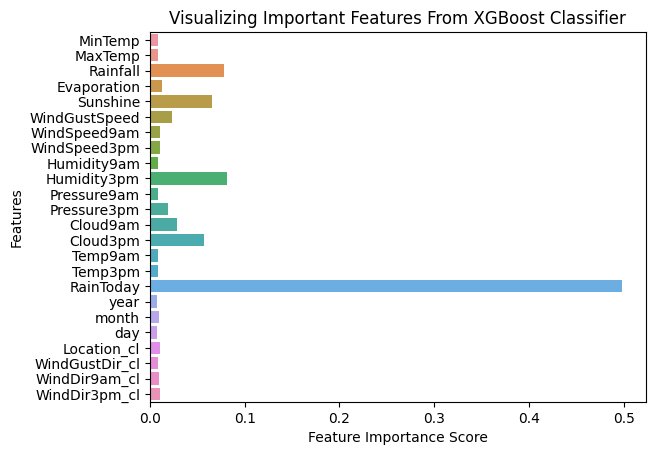

In [67]:
features = df_final.drop("RainTomorrow", axis=1)
feature_imp1 = model_xgb.feature_importances_
sns.barplot(x=feature_imp1, y=features.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost Classifier")
plt.show()

Conclusion:

        1.XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree 
        (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for
        regression, classification, and ranking problems.
        
        2.Above graph shows us the effective use of XGBoost where it is showing us that the RainToday is the most important
        feature contributing to about 50 percent of Importance in Model Building, foloowed by Humidity3pm and Rainfall
        contributing for about 9 percent each and so on. 

# Plotting Graphs Of Accuracy v/s Time :

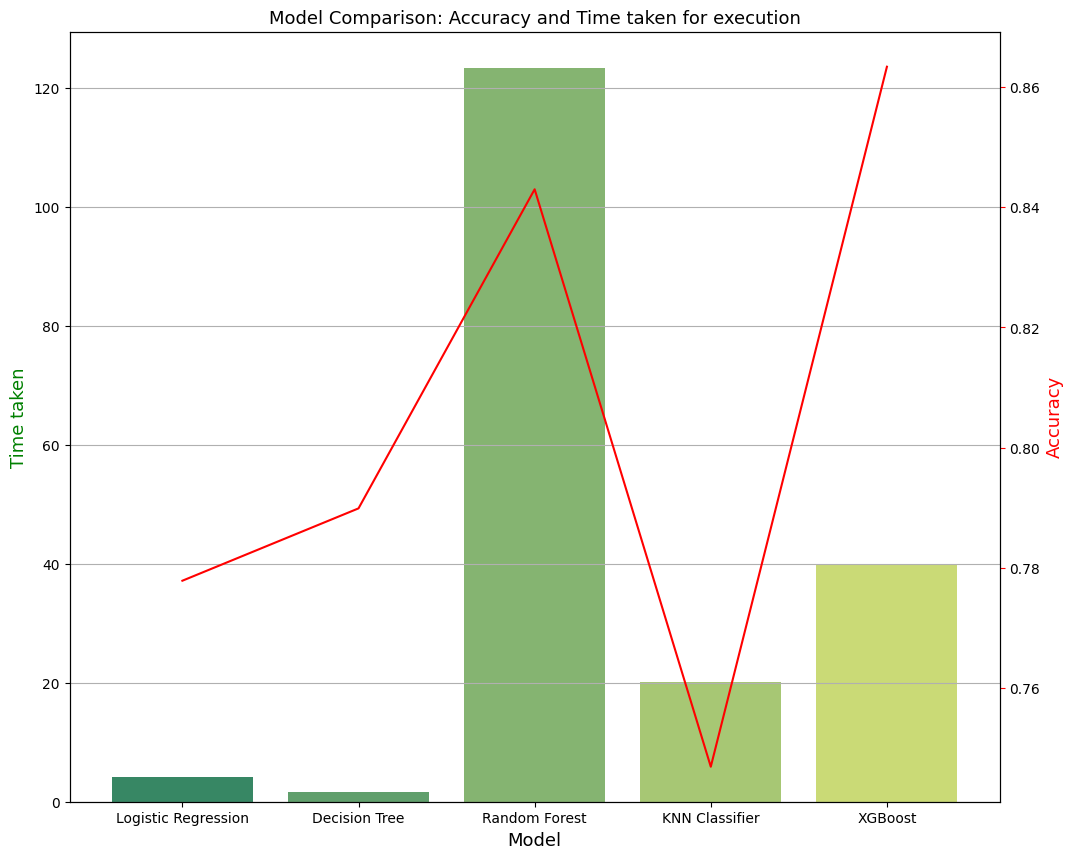

In [68]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf,accuracy_knn, accuracy_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_knn,  tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN Classifier','XGBoost'],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'green'
ax1.grid()
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Conclusion:
    
    1.Above Graph shows us the relationship of time it took to build the model and accuracy of that particaular model.
    
    2.KNN Classifier Model took very less time followed by  Logistic Regression then Decision Tree followed by Random Forest And then  XGBoost.
    3. In the case of accuracy we can see that KNN Classsifier show the least accuracy of around 75%, Followed by Logistic Regression with 78%, followed by Decision Tree with 79%, followed by random forest with 84% and lastly XGBoost with highest accuracy of around 86.5%

# Final Model Selection which gives Maximum accuracy(XGBoost)

# Selecting Important Features From XGBoost Classifier

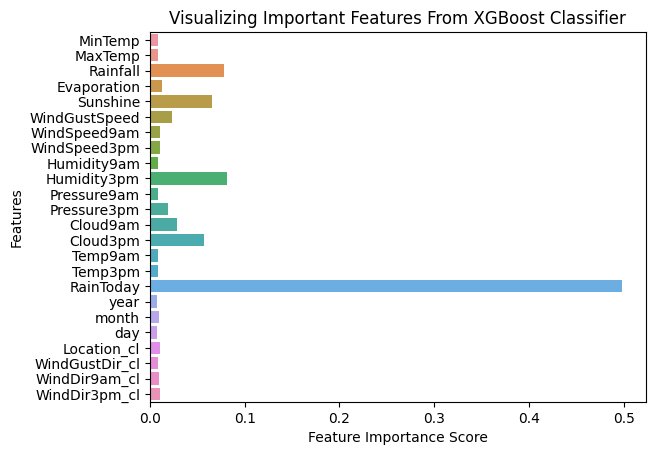

In [69]:
features = df_final.drop("RainTomorrow", axis=1)
feature_imp1 = model_xgb.feature_importances_
sns.barplot(x=feature_imp1, y=features.columns)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost Classifier")
plt.show()

In [70]:
features_final = df_final[["Rainfall","Sunshine","WindGustSpeed","Humidity3pm","Pressure3pm","Cloud9am","Cloud3pm","RainToday"]]
target_final = df_final['RainTomorrow']
# Split into test and train
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(features_final, target_final, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

In [71]:
sm=SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_train_final, y_train_final)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0.0: 90866, 1.0: 25502})
The number of classes after fit Counter({0.0: 90866, 1.0: 90866})


In [72]:
params_xgb_final ={'n_estimators': 600,
            'max_depth': 16}
model_xgb_final = xgb.XGBClassifier(**params_xgb)
model_xgb_final.fit(X_train_sm,y_train_sm)
y_pred_final = model_xgb_final.predict(X_test_final)
accuracy_xgb_final = accuracy_score(y_test_final, y_pred_final)
print("Accuracy = {}".format(accuracy_xgb_final))
print(confusion_matrix(y_test_final,y_pred_final))
print(classification_report(y_test_final,y_pred_final))


Accuracy = 0.8175443420871717
[[20425  2292]
 [ 3016  3359]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     22717
         1.0       0.59      0.53      0.56      6375

    accuracy                           0.82     29092
   macro avg       0.73      0.71      0.72     29092
weighted avg       0.81      0.82      0.81     29092



Conclusion:

    1.Here we have selected only the XGBoost Model For final model building with the important features only by the XGBoost.feature_importances_ method
    2.We have selected the top 8 features for model building.
    3.There is a change in accuracy but the complexity has been definitely reduced.

In [73]:
import pickle

In [74]:
with open('rain_pred_final.pkl', 'wb') as file:
    pickle.dump(model_xgb_final, file)

Conclusion :

    1.Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's
    the process of converting a Python object into a byte stream to store it in a file/database, maintain program state
    across sessions, or transport data over the network.
    
    2.This pickle file reduces the load of carrying multiple files such as dataset file ,ipynb file, processed_csv file,
    since all this are stored in one single pickle file.
    
    3.Pickle makes use of file handling to load the particalar model into .pkl file and later making use of it in flask 
    file.
    
    4.This file will be used in the flask file for further calculations

# Evaluating Model Based on the values Predicted by model(For Flask Application)

In [75]:
#Finding out which values to enter in flask application which will give us the accurate results by the model.
y_test_final[0:10]

111817    0.0
69937     0.0
82278     1.0
86978     0.0
39246     0.0
10187     1.0
77895     0.0
109604    0.0
8664      0.0
27060     0.0
Name: RainTomorrow, dtype: float64

In [76]:
y_pred_final[0:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [77]:
X_test_final.iloc[0:10]

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday
111817,0.200000,7.611178,35.00000,84.000000,1030.700000,4.447461,4.50993,0.0
69937,2.360918,5.977944,41.00000,51.539116,1015.255889,4.447461,4.50993,0.0
82278,0.800000,7.000000,43.00000,76.000000,1012.600000,4.447461,4.50993,0.0
86978,0.000000,10.333234,28.00000,51.000000,1017.500000,4.000000,1.00000,0.0
39246,0.000000,7.611178,28.00000,58.000000,1027.600000,4.447461,7.00000,0.0
10187,0.400000,6.600000,50.00000,75.000000,1009.900000,6.000000,6.00000,0.0
77895,0.000000,7.611178,31.00000,68.000000,1015.600000,7.000000,4.00000,0.0
109604,0.000000,9.200000,40.03523,63.000000,1024.300000,6.000000,3.00000,0.0
8664,2.500000,7.611178,50.00000,74.000000,1013.800000,8.000000,8.00000,1.0
27060,0.000000,7.611178,22.00000,40.000000,1015.255889,4.447461,4.50993,0.0
